In [1]:
# import zipfile
# with zipfile.ZipFile("first_50_test_set.zip", 'r') as zip_ref:
#     zip_ref.extractall("first_50_test_set")

In [5]:
# import tarfile
# for i in range(51):
#     tf = tarfile.open("depth_img/short_throw_depth_"+str(i)+".tar")
#     tf.extractall("depth_img/short_throw_depth_"+str(i)+"/")

In [32]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import re
import pandas as pd

(450, 448)
[193, 111]


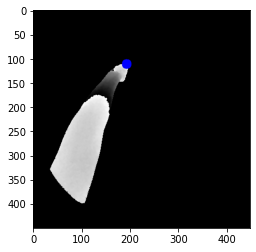

In [33]:
#for i in range(7):
img = cv2.imread("depth_img/short_throw_depth_0/"+str(5)+".pgm")

thresh1 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret,thresh1 = cv2.threshold(thresh1,127,255,cv2.THRESH_BINARY)
print(thresh1.shape)
loc = None
for i in range(0,thresh1.shape[0]):
    vali = np.sum(thresh1[i,:])
    if vali > 0:
        for j in range(0,thresh1.shape[0]):
            valj = thresh1[i,j]
            if (valj>0):
                loc = [j,i]
                break
        break
cv2.circle(img,(loc[0],loc[1]), 10, (0,0,255), -1)
print(loc)
                
plt.imshow(img)



[188.0, 138.0]
{24: 9855, 38: 3487, 31: 1871, 40: 2997, 0: 19135, 43: 2997, 42: 31681, 4: 3096, 45: 2997, 46: 26143, 36: 17058, 41: 2997, 7: 2998, 28: 1871, 27: 1871, 9: 2998, 13: 2998, 26: 1871, 50: 26143, 25: 1871, 1: 19135, 5: 2998, 34: 1871, 2: 3096, 22: 9855, 14: 20160, 18: 9855, 44: 2997, 6: 2998, 32: 1871, 3: 27247, 8: 2998, 23: 9855, 29: 1871, 37: 6453, 12: 2998, 47: 26143, 49: 26143, 21: 9855, 33: 1871, 15: 37455, 10: 2998, 30: 1871, 11: 2998, 48: 1169, 16: 9855, 20: 9855, 19: 9855, 39: 2997, 35: 11536, 17: 37455}


[0.5, 0.5]

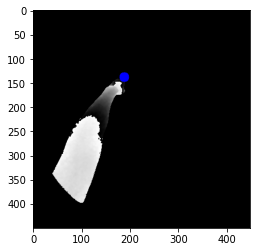

In [54]:
def find_hand(idx):
    loc = [0,0]
    len_ = 0
    root_path = "depth_img/short_throw_depth_"
    for file in os.listdir(root_path+str(idx)+"/"):
        if not file.endswith(".pgm"):
            continue
        path = os.path.join(root_path+str(idx), file)
        img = cv2.imread(path)
        thresh1 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        ret,thresh1 = cv2.threshold(thresh1,127,255,cv2.THRESH_BINARY)
        for i in range(0,thresh1.shape[0]):
            vali = np.sum(thresh1[i,:])
            if vali > 0:
                for j in range(0,thresh1.shape[0]):
                    valj = thresh1[i,j]
                    if (valj>0):
                        loc = [loc[0]+j,loc[1]+i]
                        #print(j,i)
                        cv2.circle(img,(j,i), 10, (0,0,255), -1)
                        plt.imshow(img)
                        break
                break
        len_+=1
    loc = [loc[0]/float(len_),loc[1]/float(len_)]
    return loc
print(find_hand(30))


def load_img_ids():
    root_path = "bbox_img/"
    id_dict = dict()
    for file in os.listdir(root_path):
        if not file.endswith(".jpg"):
            continue
        val = re.findall(r'\d+',file)
        id_dict[int(val[0])] = int(val[1])
    return id_dict
        
id_dict = load_img_ids()
print(id_dict)


def find_gt(id_dict,idx):  
    IMG_SIZE = [360,480]
    annots = pd.read_csv(open('test.csv','r'))
    img_id = id_dict[idx]
    #print(img_id)
    bbox_str = annots.iloc[idx, 1]
    bboxes = re.findall("\d+\.\d+",bbox_str)
    bboxes = list(map(float,bboxes))
    gt = [(bboxes[0]+bboxes[2])/2,(bboxes[1]+bboxes[3])/2]
    gt = [gt[0]/IMG_SIZE[1],gt[1]/IMG_SIZE[0]]
    return gt

def build_dataset(id_dict):
    
#build_dataset
find_gt(id_dict,0)